# Lesson 3 stuff and things

# Step one 
Load this into the notebook and it will install the needed things for this pracapp (remember not to just copy and paste because of the weird html stuff)

In [3]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 2. Find number of seconds

In [6]:
sim=60
mih=60
hid=24
diJ=30
sec_in_june=sim*mih*hid*diJ
sec_in_june

2592000

In [8]:
Sec_in_12_hr=sim*mih*12
diJULY=31
sec_in_july=sim*mih*hid*diJULY
sec_in_13day=sim*mih*hid*13
sec_by_930=(sim*mih*9)+(sim*30)
sec_since_june_at_noon=(sec_in_june+sec_in_july+sec_in_13day+sec_by_930)-Sec_in_12_hr
sec_since_june_at_noon




6384600

# 3. Population table manipulation

In [17]:
pop=Table.read_table('world_population.csv')
y=np.arange(1950,2016)
pwy=pop.with_column('Year',y)
pwy

Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954
2782098943,1955
2835299673,1956
2891349717,1957
2948137248,1958
3000716593,1959


In [19]:
#Population in 2015
popin15=pwy.where('Year', are.equal_to(2015))
popin15

Population,Year
7256490011,2015


The population grew 4698861357 people from 1950 to 2015


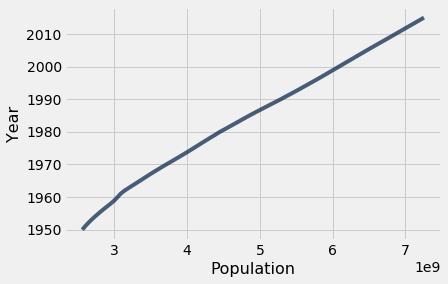

In [35]:
# population growth from 1950 to 2015 with a little graph for fun
pwy.plot('Population', 'Year')
pi15=int(pwy.where('Year',are.equal_to(2015)).column('Population'))
pi50=int(pwy.where('Year',are.equal_to(1950)).column('Population'))
popgrowth=print('The population grew',pi15-pi50,'people from 1950 to 2015')

In [40]:
#Average annual growth rate over the course of the data set
t=2015-1950
rate=((pi15/pi50)**((1/t)-1))*100
print('The growth rate over this time period is',rate,'%')

The growth rate over this time period is 35.816109726997716 %


# 4. A titanic data set

Load info from this site [Titanic_info][] to get the data and check out [Kaggle][] for info on the data

[Titanic_info]:http://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv
[Kaggle]:http://www.kaggle.com/c/titanic


In [42]:
#load data
titanic=Table.read_table('Titanic.csv')
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [142]:
#relabel
pclass=titanic.select('Pclass').column('Pclass')
titan=titanic.drop('Pclass').with_column('passenger_class', pclass)
titan

PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class
1,0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,3
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,3
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,3
6,0,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,3
7,0,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1
8,0,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,3
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,3
10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,2


In [143]:
#new column
sibs=titanic.select('SibSp').column('SibSp')
otwtar=titanic.select('Parch').column('Parch')
fam=sibs+otwtar
tit=titan.with_column('family_size', fam)
tit

PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,family_size
1,0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,3,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1,1
3,1,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,3,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1,1
5,0,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,3,0
6,0,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,3,0
7,0,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,0
8,0,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,3,4
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,3,2
10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,2,1


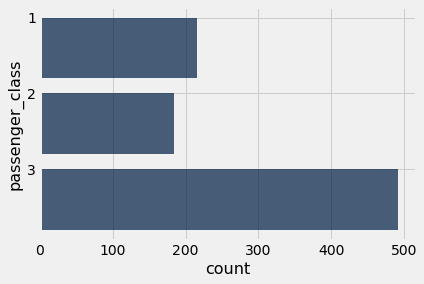

In [79]:
#passenger count by class
f=tit.group('passenger_class')
f.barh('passenger_class', 'count')

In [83]:
#youngest passengers
tit.sort('Age').show(5)

PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,family_size
804,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,3,1
756,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2,2
470,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3,3
645,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3,3
79,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2,2


In [84]:
#oldest passengers
tit.sort('Age', descending=True).show(5)

PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,family_size
889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S,3,3
879,0,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S,3,0
869,0,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S,3,0
864,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S,3,10
860,0,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C,3,0


In [101]:
#oldest passengers fixed
tit.where('Age', are.between(0,1000)).sort('Age',descending=True).show(5)

PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,family_size
631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,1,0
852,0,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,3,0
494,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,1,0
97,0,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,1,0
117,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,3,0


In [139]:
#survival rate by passenger class
a=tit.where('Survived', are.equal_to(1)).group('passenger_class')
s=a.select('count').column('count')
b=tit.where('Survived', are.equal_to(0)).group('passenger_class')
d=b.select('count').column('count')
r=100*(s/(s+d))
a.drop('count').with_column('survival rate(%)',r)

passenger_class,survival rate(%)
1,62.963
2,47.2826
3,24.2363


In [153]:
#survival rate by sex
tots=tit.group('Sex').select('count').column('count')
sur=tit.where('Survived', are.equal_to(1)).group('Sex').select('count').column('count')
sr=100*(sur/tots)
tit.group('Sex').drop('count').with_column('Survival rate(%)',sr)

Sex,Survival rate(%)
female,74.2038
male,18.8908


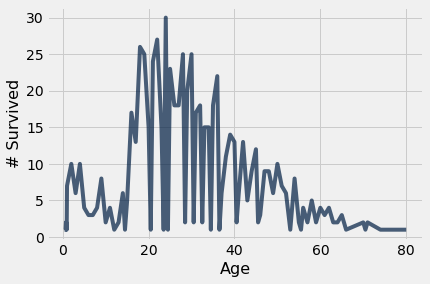

In [159]:
#how many passengers by age were abord
gg=tit.where('Age', are.between(0,100)).group('Age')
y=gg.select('count').column('count')
tit.where('Age', are.between(0,100)).group('Age').drop('count').with_column('# Survived',y).plot('Age', '# Survived')